# Board Game Review Rating Predictor


* Name: Bhavik Samir Shah
* Email ID: bhaviksamir.shah@mavs.uta.edu


## Summary

The main aim of the project is to predict the rating of a game review based on the review provided as input. The purpose of this project is handling large scale data and understanding the working of classification algorithms. Also creating a web User Interface and hosting it on cloud.
The main challenge of this project was handling the large scale data and creating a prediction model that can be deployed on cloud to provide the predicted output in good time. The textual data was cleaned by removing the 'urls', 'emojis', Stopwords, and other special characters that were redundant for the classification model i.e Multinomial Naive Bayes Classifier. for prediction.

## Project Links

### [Project Demo](http://bsshah4216.pythonanywhere.com/)

### [GitHub Repo](https://github.com/shah-bhavik204/BoardGamePrediction)

### [Video link](https://youtu.be/fRhuZLYC2bo) 

## Reference

* https://www.kaggle.com/abhishekmshinde3097/datamining-termproject

### Contribution over the reference

In the above Reference, multiple classifier algorithms are applied to the data like SVM and Multinomial Naive Bayes Classifier. After removing the null values from the dataset,the data is splitted into Training and Test data by ratio of 75:25. Here the whole training data is used for training the model.

The data is very large and imbalanced even after removing the null values. To combat this problem, Resampling strategies for imbalanced dataset is used for pre-processing the dataset. The aim of this stratergy is to reduce the learning rate for training the model while maintaing the accuracy. Further explaination is given below.

### Challanges

1. Due to large data, the learning time for training the model was very high i.e upto 2.5 hours. Also the data is very imbalanced. 
    **Soultion**: Used Random Undersampling technique. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).The leaarning rate reduced to less than 3 minutes.
2. While deploying the saved model in "Pythonanywhere", the model required transformed Tfid vector for the prediction. While Tfid tranformer requires train vectors to be fitted and transformed for transformation of test vector.
    **Solution**: Saved the training Tfid vectors as "vectorizer.pickle" in localhost and uploaded the file on server for vector transormation.  



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Reading Dataset File**

Here, after mounting our drive and importing our essential libraries, we read our dataset from its source using Pandas, as we want to read the data into our dataframe.

In [ ]:
df = pd.read_csv('/kaggle/input/boardgamegeek-reviews/bgg-15m-reviews.csv')
df.head()


As we know, the scope of our project is to predict the rating, given a review. Therefore, we are only concerned with the columns "rating" and "comment".

Therefore, we drop the rest of the columns as they would not fit any purpose for our data analysis. Hence, here, we drop the "ID","user","name" below.

Dropping Column "ID", "user", "name".

Removing the rows with "NaN" values in "comment".

Rounded the ratings to its closest integer.

In [ ]:
#removing the rows without comments
df = df.drop(columns=["Unnamed: 0", 'user', 'ID', 'name'])
df = df.dropna(subset=['comment'])
df['rating'] = df.rating.apply(lambda x: round(x))

We use the .head() function to display the top 5 records of our dataset.

As you can see below, we have 5 rows of data, and the column names are also available.

In [ ]:
df.head()
# print(len(df[df.rating == 1]))

In [ ]:
df.size

> Here is the sorted list of classes with its length. 

In [ ]:
df.rating.value_counts(sort=True)

In [ ]:
df.rating.value_counts()
sns.countplot(x="rating", data=df, palette="magma")
plt.show()


## Resampling

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

![1](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

Let's implement a basic example, which uses the DataFrame.sample method to get random samples each class:

In [ ]:
rating_0_count,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,rating_6_count,rating_7_count,rating_8_count,rating_9_count,rating_10_count = df.rating.value_counts(sort= False)

In [ ]:
df_class_0 = df[df['rating'] == 0]
df_class_1 = df[df['rating'] == 1]
df_class_2 = df[df['rating'] == 2]
df_class_3 = df[df['rating'] == 3]
df_class_4 = df[df['rating'] == 4]
df_class_5 = df[df['rating'] == 5]
df_class_6 = df[df['rating'] == 6]
df_class_7 = df[df['rating'] == 7]
df_class_8 = df[df['rating'] == 8]
df_class_9 = df[df['rating'] == 9]
df_class_10 = df[df['rating'] == 10]

## Random under-sampling

Here all the classes are sampled into the length of a class with minimum size i.e "df_class_1" for balancing the data.


In [ ]:
df_rating_2_under = df_class_2.sample(rating_1_count)
df_rating_3_under = df_class_3.sample(rating_1_count)
df_rating_4_under = df_class_4.sample(rating_1_count)
df_rating_5_under = df_class_5.sample(rating_1_count)
df_rating_6_under = df_class_6.sample(rating_1_count)
df_rating_7_under = df_class_7.sample(rating_1_count)
df_rating_8_under = df_class_8.sample(rating_1_count)
df_rating_9_under = df_class_9.sample(rating_1_count)
df_rating_10_under = df_class_10.sample(rating_1_count)
# len(df_rating_10_under)
df_under = pd.concat([ df_class_1, df_rating_2_under, df_rating_3_under, df_rating_4_under, df_rating_5_under, df_rating_6_under, df_rating_7_under, df_rating_8_under, df_rating_9_under, df_rating_10_under], axis=0)

print('Size after Random under-sampling:',len(df_under))

# print(df_test_under.target.value_counts())

# df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

**After Under-sampling**

In [ ]:
df_under.rating.value_counts()
sns.countplot(x="rating", data=df_under, palette="magma")
plt.show()


## Pre-processing of Sample Data

In the cleaning process for our text data, we:

* Remove all Punctuations that are present in our text data.
* Convert all text data into a standardized LowerCase Text.
* Removing all the Stopwords from our text data.
* Stopwords are a set of commonly used words, irrespective of the language. The main reason for removing Stopwords from our text data is so that if we remove the common words, we will be able to focus on the important words instead.

To import the list of stopwords which we can use to remove them easily, we need to use nltk and download it to our system one time so that we can perform text cleaning without errors.



In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text



**All the processed data is then added to column name "processed_comments"**

In [ ]:
df_under['processed_comments'] = df_under.comment.apply(lambda x: clean_text(x))


In [ ]:
df_under.head()

> ## Splitting the Dataset into Train and Test Subsets¶

Since the Total Dataset is still huge, we split it into Train And Test Set in a 80:20 ratio.

For this operation, we use train_test_split library from Sklearn package.

The train_test_split function is for splitting a single dataset for two different purposes: training and testing. The training subset is for building your model. The testing subset is for using the model on unknown data to evaluate the performance of the model. This function makes random partitions for the two subsets.

In [ ]:
from sklearn.model_selection import train_test_split
# df_under
X = df_under['processed_comments']
y = df_under['rating']
# X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.size

In [ ]:
X_test.size

## Multinomial Naive Bayes
Multinominal Naive Bayes (MNB) algorithm has been widely used in text classification due to its computational advantage and simplicity. MNB maximizes likelihood rather than conditional likelihood or accuracy.The task of text classification can be approached from a Bayesian learning perspective, which assumes that the word distributions in documents are generated by a specific parametric model, and the parameters can be estimated from the training data. Below Equation shows Multinominal Naive Bayes (MNB) model which is one such parametric model commonly used in text classification.

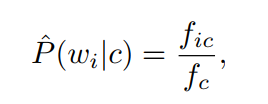

Here fi is the number of occurrences of a word wi in a document d, P(wijc) is the conditional probability that a word wi may happen in a document d given the class value c, and n is the number of unique words appearing in the document d.Conditional probability P(wijc) can be determined using the relative frequency of the word wi in documents belonging to class c.

Here fic is the number of times that a word wi appears in all documents with the class label c, and fc is the total number of words in documents with class label c in T.

One advantage of the Multinominal Naive Bayes model is that it can make predictions efficiently.

In [ ]:
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve

In [ ]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

count_vectorizer = feature_extraction.text.TfidfVectorizer(stop_words='english')

train_vectors = count_vectorizer.fit_transform(X_train)
test_vectors = count_vectorizer.transform(X_test)

clf2 = MultinomialNB()
clf2.fit(train_vectors, y_train)

y_pred_nb = np.round(clf2.predict(test_vectors))
print(y_pred_nb)



## Range Accuracy on Multinomial Naive Bayes is 25.4% 

In [ ]:
acc2 = accuracy_score(y_pred_nb, np.round(y_test))
print('Range Accuracy on Multinomial Naive Bayes : {} %'.format(acc2*100))

## Lets have funn

In [ ]:
comment = input("Enter comment here...\n")
# print(comment)
#   if comment == 'q':
#     break
comment = count_vectorizer.transform([comment])
# print('Score of prediction:'comment)
rating = clf2.predict(comment)[0]

print("The predicted rating is:",rating)